<IPython.core.display.Javascript object>


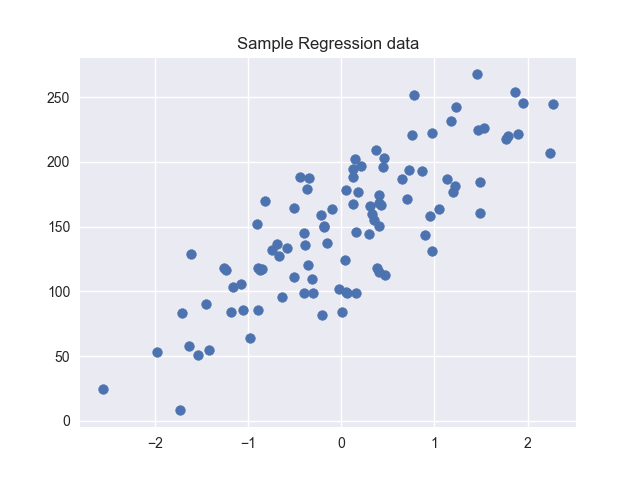

In [56]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


# regression dataSet
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample Regression data')
X_R1, y_R1 = make_regression(n_samples=100,n_features=1,
                            n_informative=1,bias=150.0,
                            noise=30,random_state=0)
plt.scatter(X_R1,y_R1,s=50)
plt.show()

<IPython.core.display.Javascript object>


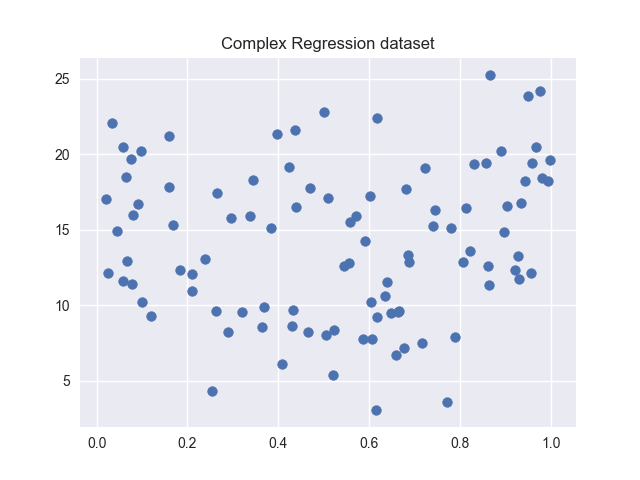

In [57]:
# complex regression dataset
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex Regression dataset')
X_F1,y_F1 = make_friedman1(n_samples=100,n_features=7,
                          random_state=0)
plt.scatter(X_F1[:,2],y_F1, s=50)
plt.show()

<IPython.core.display.Javascript object>


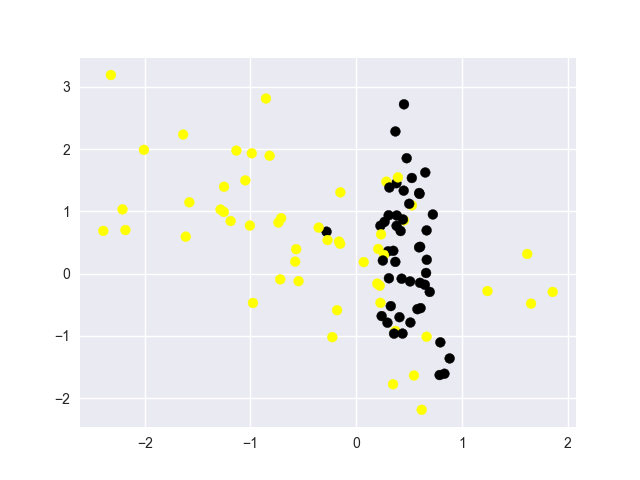

In [58]:
# dataset for classification 
plt.figure()
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

<IPython.core.display.Javascript object>


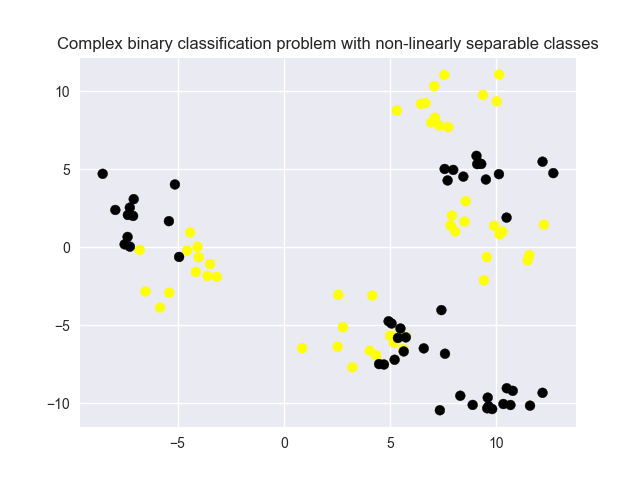

In [59]:
# Complex Binary Classification
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Complex binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [60]:
# Breast Cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Crime dataset
(X_crime, y_crime) = load_crime_dataset()

# K-Nearest Neighbours


<IPython.core.display.Javascript object>


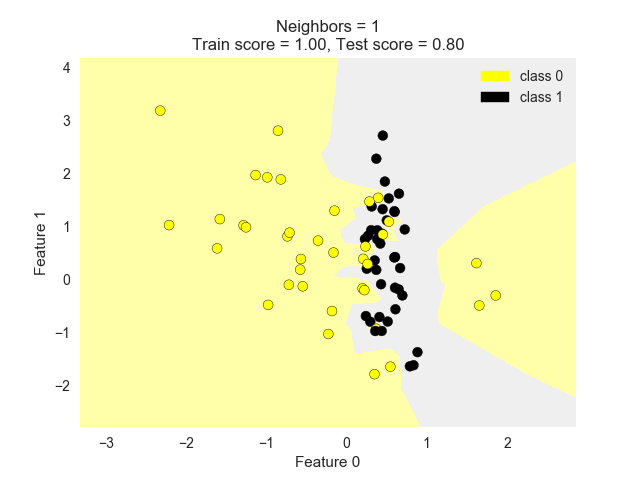

<IPython.core.display.Javascript object>


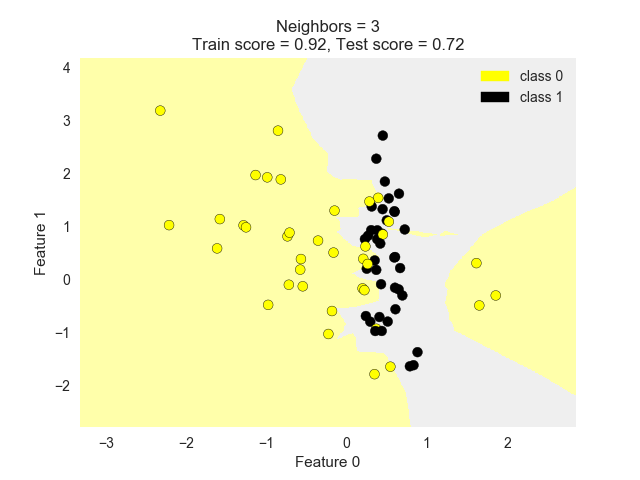

<IPython.core.display.Javascript object>


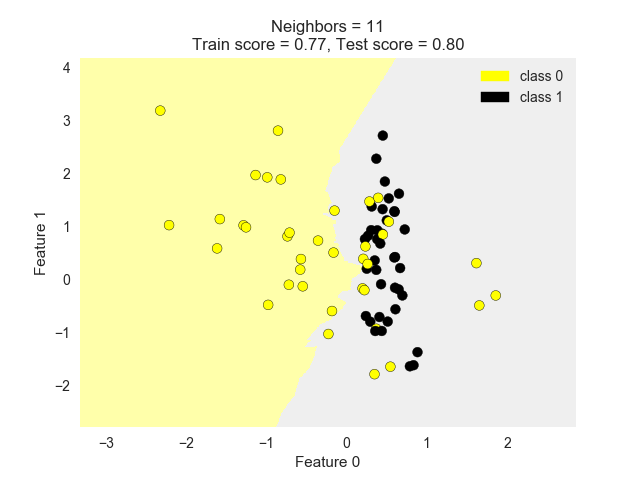

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from adspy_shared_utilities import plot_two_class_knn

X_train,X_test,y_train,y_test = train_test_split(X_C2,y_C2,random_state=0)

plot_two_class_knn(X_train,y_train,1,'uniform',X_test,y_test)
plot_two_class_knn(X_train,y_train,3,'uniform',X_test,y_test)
plot_two_class_knn(X_train,y_train,11,'uniform',X_test,y_test)

# K-Neighbours Regression


In [63]:
from sklearn.neighbors import KNeighborsRegressor
X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)
knnreg= KNeighborsRegressor(n_neighbors=5).fit(X_train,y_train)
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test,y_test)))


R-squared test score: 0.425


<IPython.core.display.Javascript object>


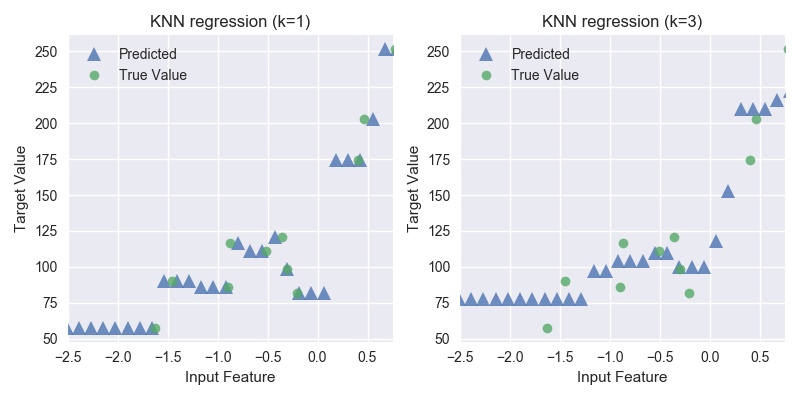

In [64]:
import numpy as np
fig,subaxes =plt.subplots(1,2,figsize=(8,4))
X_predict_input= np.linspace(-3,3,50).reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X_R1[0::5],
                                                 y_R1[0::5],
                                                 random_state=0)
for thisaxis , K in zip(subaxes,[1,3]):
    knnreg= KNeighborsRegressor(n_neighbors=K).fit(X_train,y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5,0.75])
    thisaxis.plot(X_predict_input,y_predict_output,'^',markersize=10,
                 label='Predicted',alpha=0.8)
    thisaxis.plot(X_train,y_train,'o',label='True Value',alpha=0.8)
    thisaxis.set_xlabel('Input Feature')
    thisaxis.set_ylabel('Target Value')
    thisaxis.set_title('KNN regression (k={})'.format(K))
    thisaxis.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


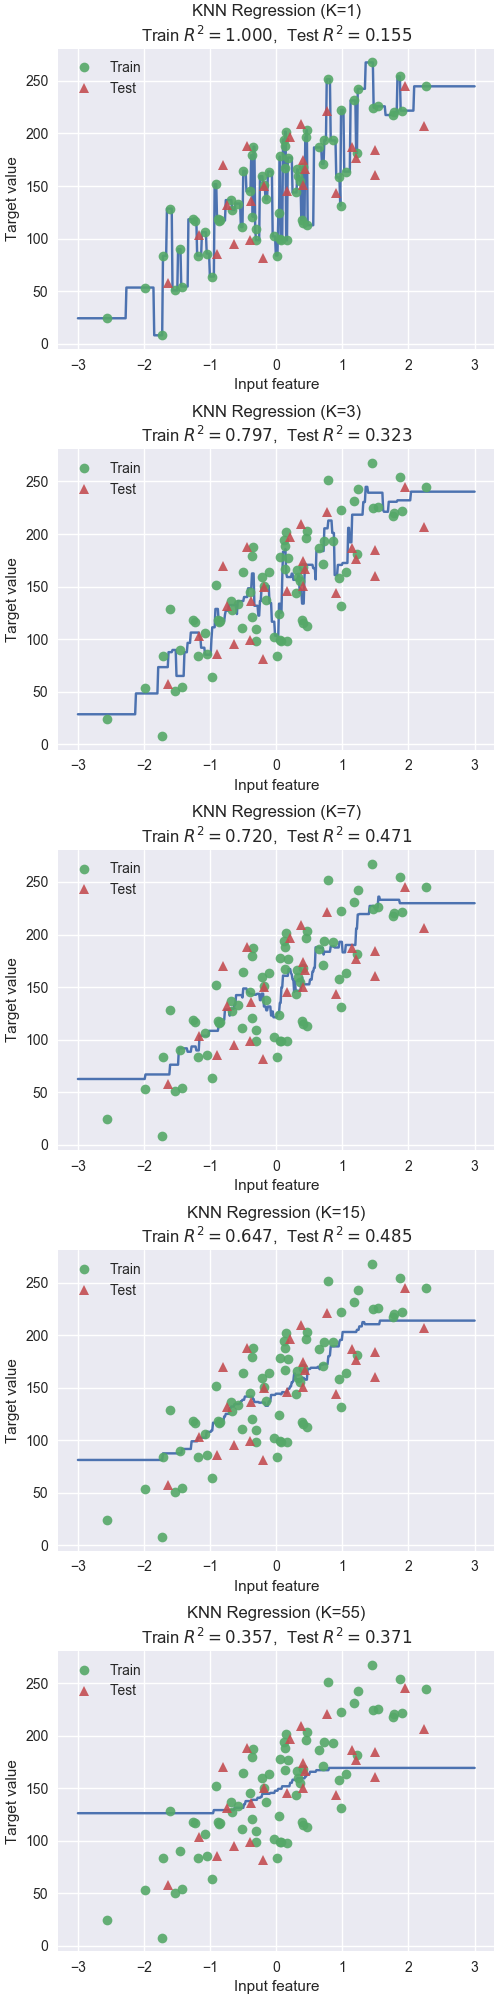

In [65]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

# Linear Regression

Slope [ 45.70870465]
y intercept 148.44575345658873
0.678595077114
0.491596159349


<IPython.core.display.Javascript object>


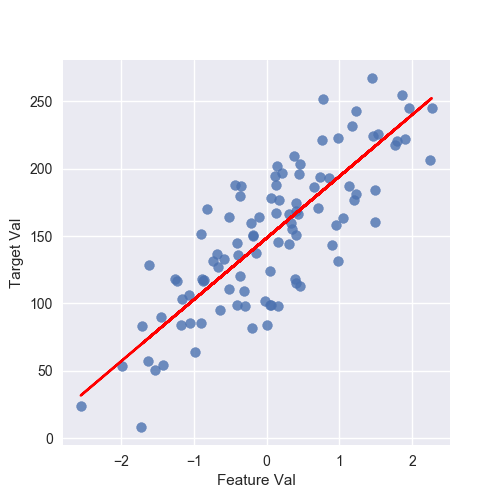

In [66]:
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)
linreg =LinearRegression().fit(X_train,y_train)
print('Slope {}'.format(linreg.coef_))
print('y intercept {}'.format(linreg.intercept_))
print(linreg.score(X_train,y_train))
print(linreg.score(X_test,y_test))

plt.figure(figsize=(5,5))
plt.scatter(X_R1,y_R1,marker='o',s=50,alpha=0.8)
plt.plot(X_R1,linreg.coef_*X_R1 + linreg.intercept_,'r-')
plt.xlabel('Feature Val')
plt.ylabel('Target Val')
plt.show()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)


print('R-squared test : {}'.format(linreg.score(X_test,y_test)))

R-squared test : 0.495544522795166


# Ridge Regression

In [69]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(X_crime,y_crime,
                                                random_state=0)
linridge= Ridge(alpha=20.0).fit(X_train,y_train)
print('Training score {}'.format(linridge.score(X_train,y_train)))
print('Test data score {}'.format(linridge.score(X_test,y_test)))

Training score 0.6709349944606453
Test data score 0.4940490145966777


# Ridge Regression with Feature Scaling

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train,X_test,y_train,y_test = train_test_split(X_crime,y_crime,
                                                random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

linridge= Ridge(alpha=20.0).fit(X_train_scaled,y_train)

print('Training score {}'.format(linridge.score(X_train_scaled,y_train)))
print('Test data score {}'.format(linridge.score(X_test_scaled,y_test)))

Training score 0.6146175955616785
Test data score 0.6203186557130429


# Polynomial Regression

In [71]:

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_F1_poly=poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Training score {}'.format(linreg.score(X_train,y_train)))
print('Test data score {}'.format(linreg.score(X_test,y_test)))

Training score 0.7223750207373035
Test data score 0.7221339576925412


# Logistic Regression

In [72]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height','width','mass','color_score']
X_fruits= fruits[feature_names_fruits]
y_fruits=['fruit_label']

target_names_fruits = ['apple','mandarin','orange','lemon']
X_fruits_2d = fruits[ ['height','width'] ]
y_fruits_2d = fruits['fruit_label']


<IPython.core.display.Javascript object>


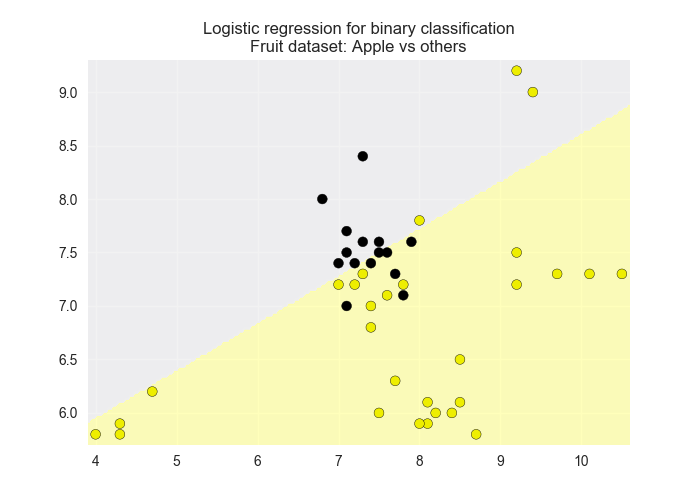

A fruit with height 6 and width 8 is predicted to be: an apple
Train Score  0.7727272727272727
Test Score 0.7333333333333333


In [73]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
fig , subaxes = plt.subplots(1,1,figsize=(7,5))
y_fruits_apple = y_fruits_2d == 1
X_train,X_test,y_train,y_test = (train_test_split(X_fruits_2d.as_matrix(),
                                                y_fruits_apple.as_matrix(),
                                                random_state=0) )
clf = LogisticRegression(C=100).fit(X_train,y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)
plt.show()
h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
print(  "Train Score  {}".format(clf.score(X_train,y_train)) )
print("Test Score {}". format ( clf.score(X_test,y_test) ) )

<IPython.core.display.Javascript object>


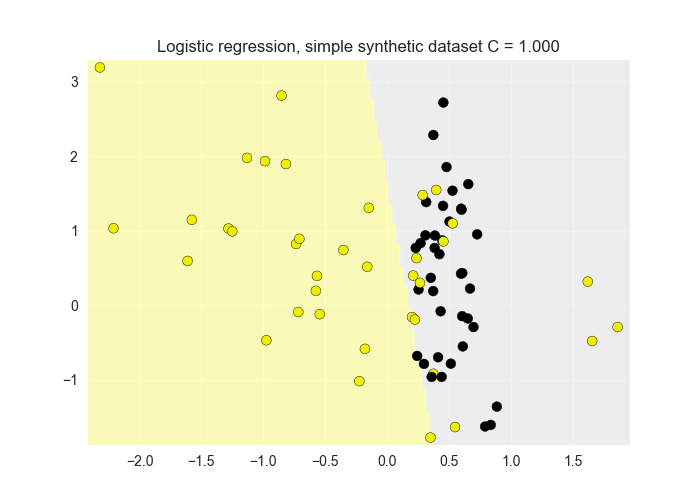

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.80


In [75]:

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)
#plt.show()
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

<IPython.core.display.Javascript object>


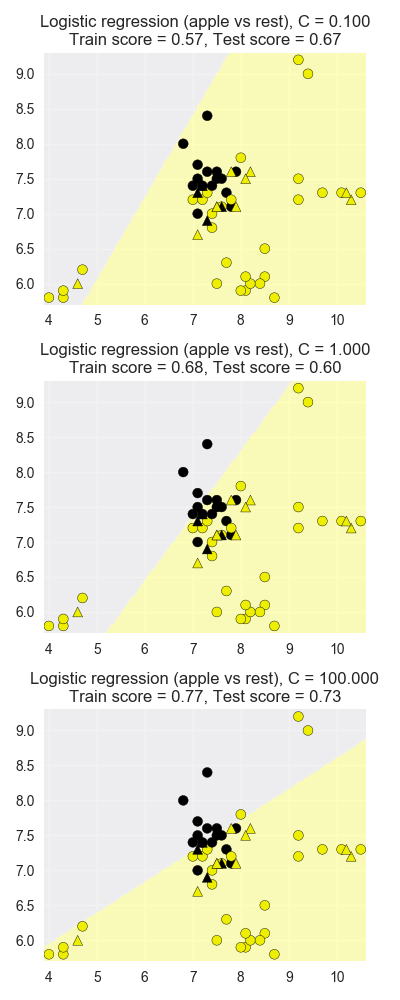

In [76]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state=0))
fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()
plt.show()

In [77]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96


# Support Vector Machine

<IPython.core.display.Javascript object>


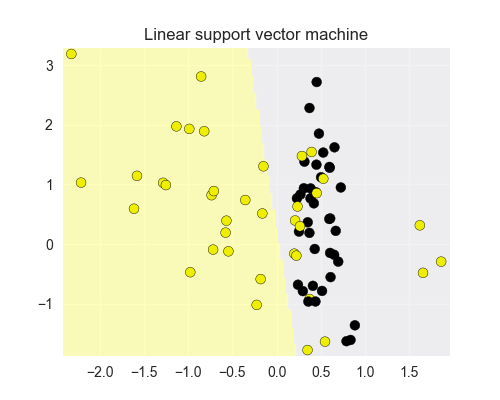

In [92]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test= train_test_split(X_C2,y_C2,random_state=0)
clf= SVC(kernel='linear',C=1).fit(X_train,y_train)
fig, subaxes= plt.subplots(1,1,figsize=(5,4))
plot_class_regions_for_classifier_subplot(clf,X_train,y_train,None,None,'Linear support vector machine',subaxes)
plt.show()

<IPython.core.display.Javascript object>


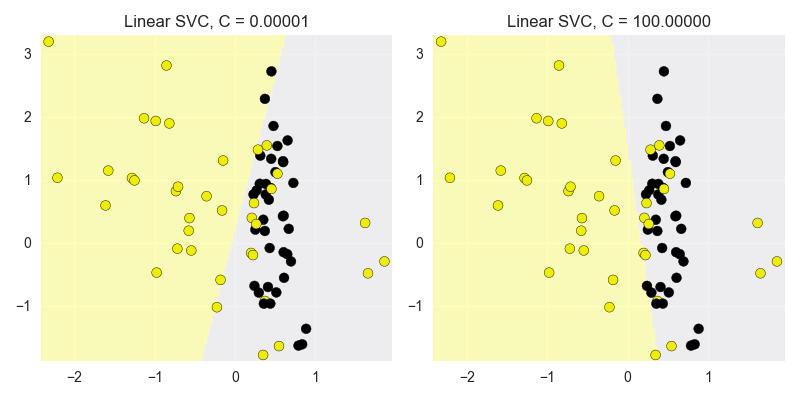

In [93]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()
plt.show()

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)
clf = LinearSVC().fit(X_train,y_train)
print('Train Score {}'.format(clf.score(X_train,y_train)))
print('Test Score {}'.format(clf.score(X_test,y_test)))

Train Score 0.931924882629108
Test Score 0.9370629370629371


<IPython.core.display.Javascript object>


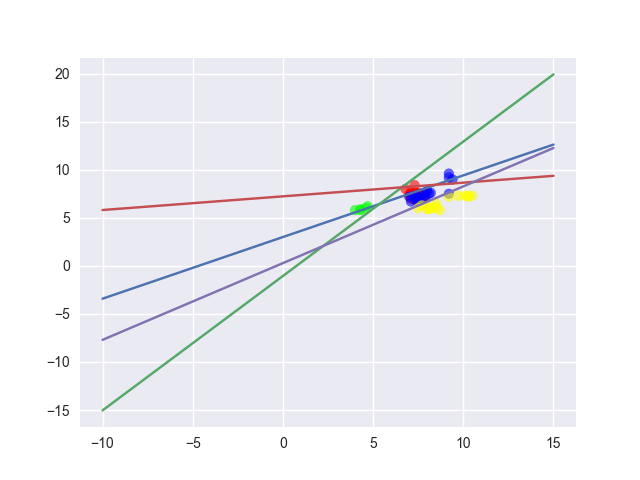

In [95]:
clf= LinearSVC().fit(X_fruits_2d,y_fruits_2d)
plt.figure()
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])
plt.scatter(X_fruits_2d['height'],X_fruits_2d['width'],c=y_fruits_2d,cmap=cmap_fruits,alpha=0.6)
x_0_range = np.linspace(-10, 15)
for intercep,coeff,color in zip(clf.intercept_,clf.coef_,['r','b','g','y']):
    plt.plot(x_0_range,-(x_0_range*coeff[0] + intercep)/coeff[1],)
plt.show()

## Kernelized Support Vector Machine

<IPython.core.display.Javascript object>


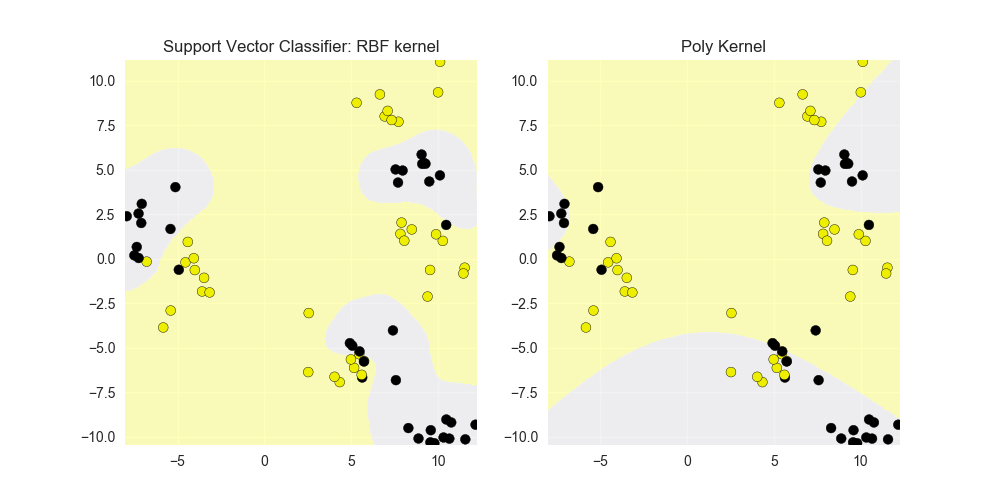

In [96]:
from adspy_shared_utilities import plot_class_regions_for_classifier
X_train,X_test,y_train,y_test  = train_test_split(X_D2,y_D2,random_state=0)

fig,subaxes = plt.subplots(1,2,figsize=(10,5))
# radial basis
plot_class_regions_for_classifier_subplot(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel',subaxes[0])

plot_class_regions_for_classifier_subplot(SVC(kernel="poly",degree=3).fit(X_train,y_train),
                                  X_train,y_train,None,None,'Poly Kernel',subaxes[1])

<IPython.core.display.Javascript object>


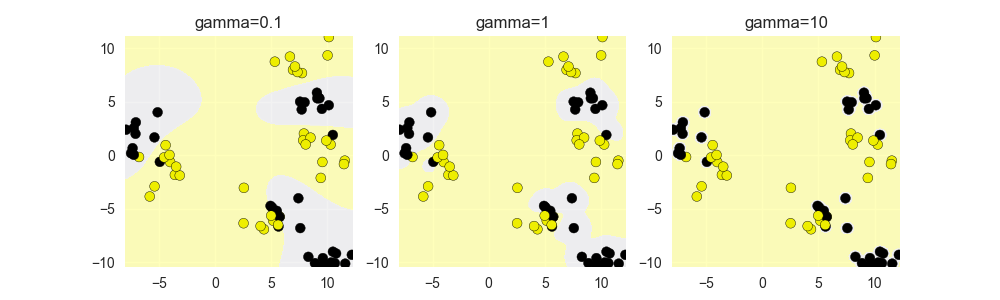

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X_D2,y_D2,random_state=0)
fig,subaxes = plt.subplots(1,3,figsize=(10,3))
for this_gamma, subplot in zip([0.1,1,10],subaxes):
    clf=SVC(kernel='rbf',gamma=this_gamma).fit(X_train,y_train)
    plot_class_regions_for_classifier_subplot(clf,X_train,y_train,None,None,'gamma={}'.format(this_gamma),subplot)
plt.show()

<IPython.core.display.Javascript object>


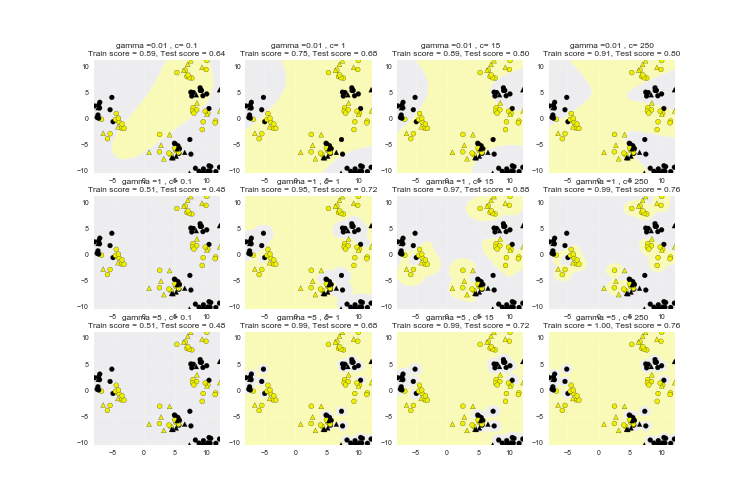

In [98]:
X_train, X_test , y_train,y_test = train_test_split(X_D2,y_D2,random_state=0)
fig ,subaxes = plt.subplots(3,4,figsize=(15,10),dpi=50)
for this_gamma,this_axes in zip([0.01, 1, 5],subaxes):
    for this_c, this_plot in zip([0.1, 1, 15, 250],this_axes):
        title='gamma ={} , c= {}'.format(this_gamma,this_c)
        clf= SVC(kernel='rbf',C=this_c,gamma=this_gamma).fit(X_train,y_train)
        plot_class_regions_for_classifier_subplot(clf,X_train,y_train,X_test,y_test,title,this_plot)
plt.show()
        

##### SVM Without Normalisation

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)
clf = SVC(C=10).fit(X_train,y_train)
print('Train Score {}'.format(clf.score(X_train,y_train)))
print('Test Score {}'.format(clf.score(X_test,y_test)))

Train Score 1.0
Test Score 0.6293706293706294


#### SVM With Normalisation

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = SVC(C=10).fit(X_train_scaled,y_train)
print('Train Score {}'.format(clf.score(X_train_scaled,y_train)))
print('Test Score {}'.format(clf.score(X_test_scaled,y_test)))

Train Score 0.9765258215962441
Test Score 0.958041958041958


# Cross-Validation

In [101]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors=5)
X=X_fruits_2d.as_matrix()
y=y_fruits_2d.as_matrix()
cv_scores=cross_val_score(clf,X,y)
print('Cross_val_Score {}'.format(cv_scores))
print('Average {}'.format(np.mean(cv_scores)))


Cross_val_Score [ 0.77272727  0.73684211  0.83333333]
Average 0.7809675704412546


# Decision Tree

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import  plot_decision_tree
iris=load_iris()

X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=3)
clf=DecisionTreeClassifier().fit(X_train,y_train)
print('Train Accuracy : {}'.format(clf.score(X_train,y_train)) )
print('Test Accuracy : {}'.format(clf.score(X_test,y_test)))

In [ ]:
clf = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
print('Train Accuracy : {}'.format(clf.score(X_train,y_train)) )
print('Test Accuracy : {}'.format(clf.score(X_test,y_test)))

<IPython.core.display.Javascript object>


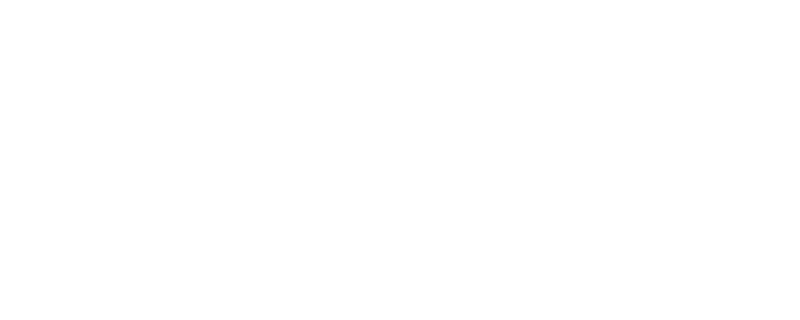

AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [50]:
import matplotlib.pyplot as plt

from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

## Decision tree on cancer data

Test Score : 0.9647887323943662
Train Score : 0.9370629370629371


<IPython.core.display.Javascript object>


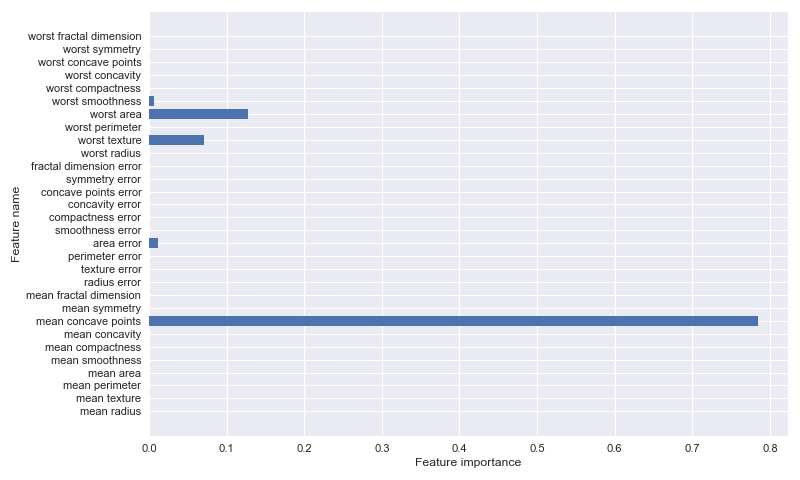

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)
clf = DecisionTreeClassifier(max_depth=4 , min_samples_leaf=8,random_state=0).fit(X_train,y_train)
print('Test Score : {}'.format(clf.score(X_train,y_train)))
print('Train Score : {}'.format(clf.score(X_test,y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()